In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import scipy.stats as stats

In [2]:
path='/home/corinnet/workspace/aiephys/rundown_results/'
connection_folders=[os.path.join(path, d) for d in os.listdir(path)] 

# get all the csv files
csvs=[]
for folder in connection_folders:
    files=os.listdir(folder)
    csvs.append(os.path.join(folder,np.array(files)[np.array([file.endswith('.csv') for file in files])][0]))
#print csvs

/home/corinnet/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


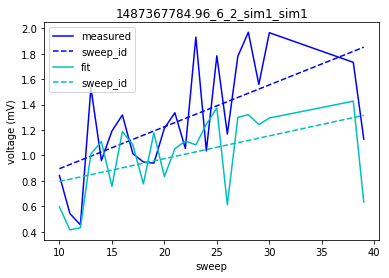

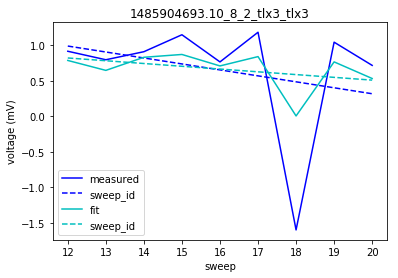

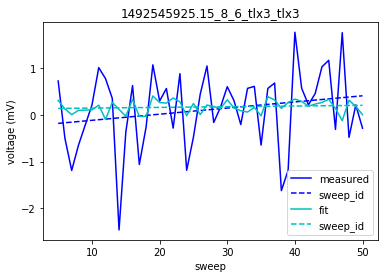

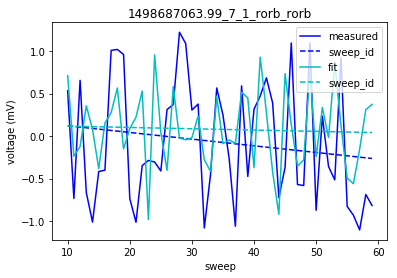

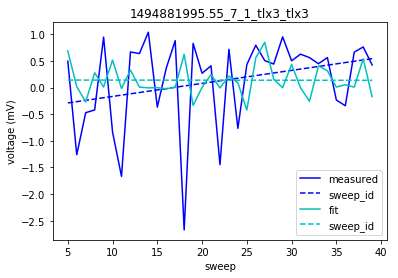

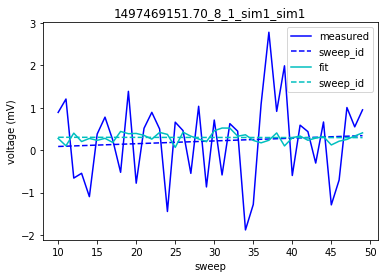

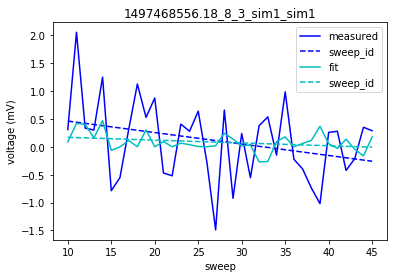

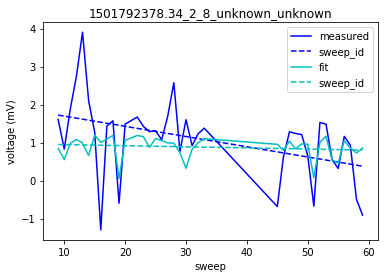

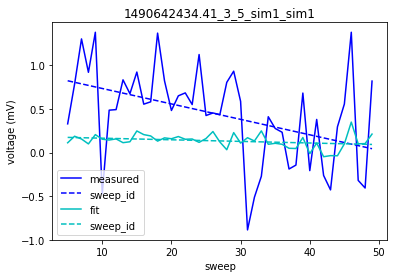

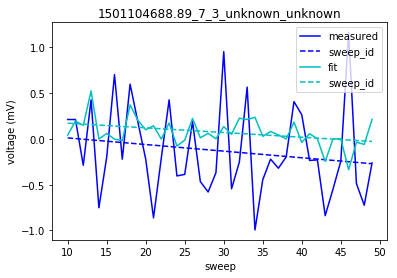

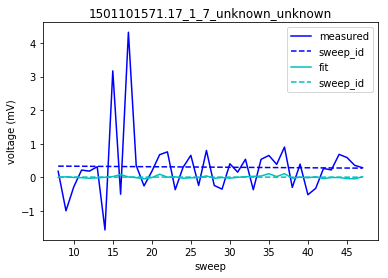

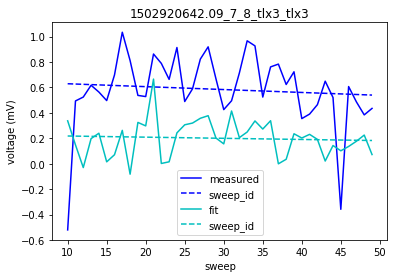

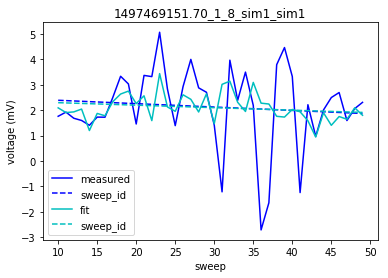

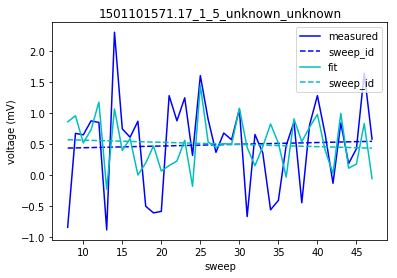

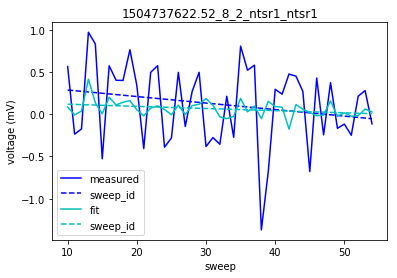

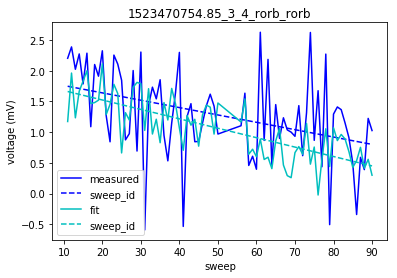

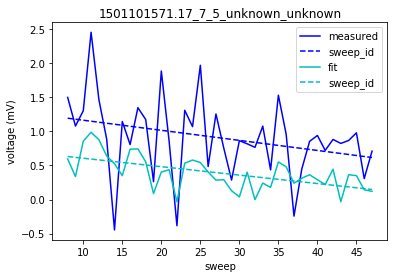

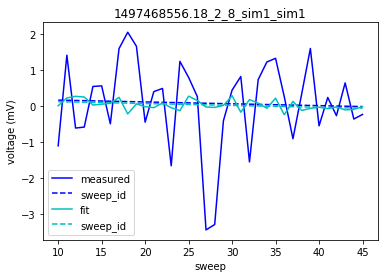

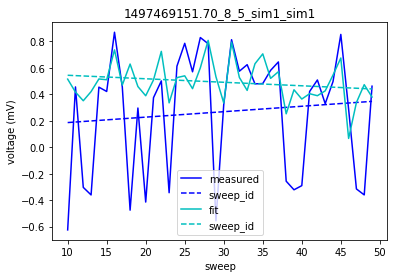

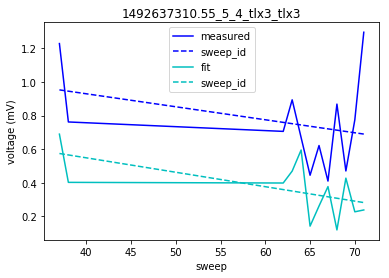

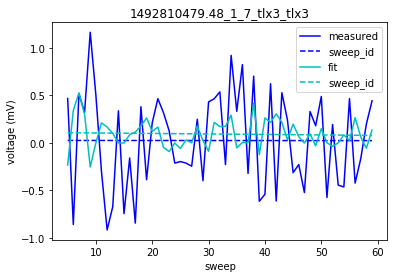

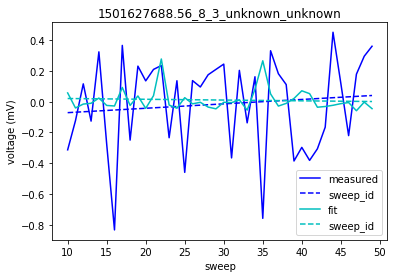

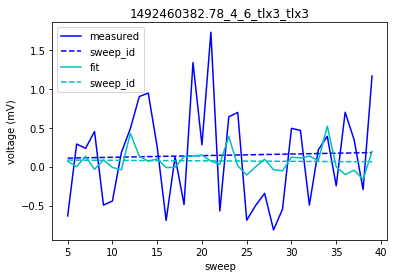

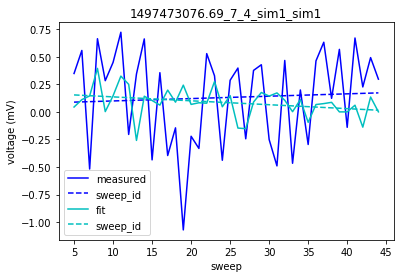

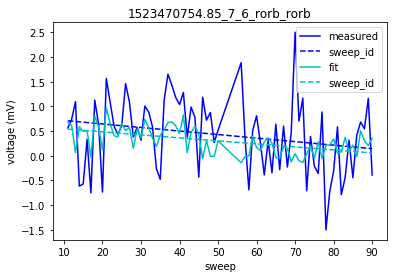

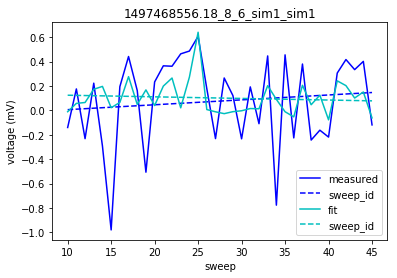

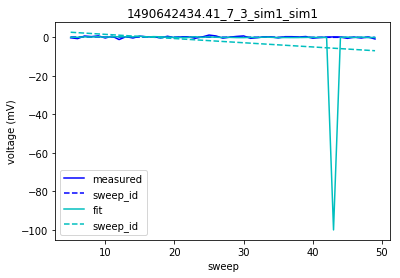

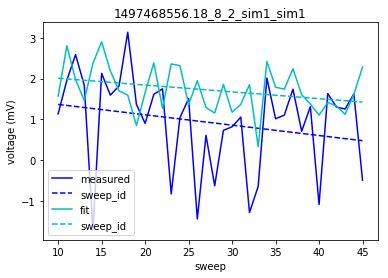

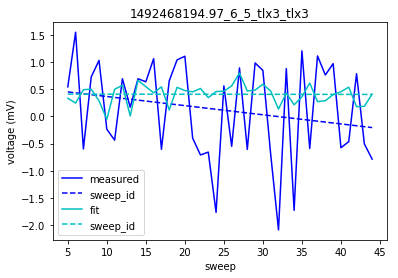

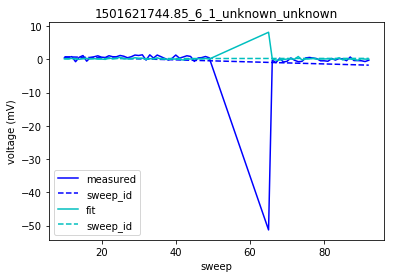

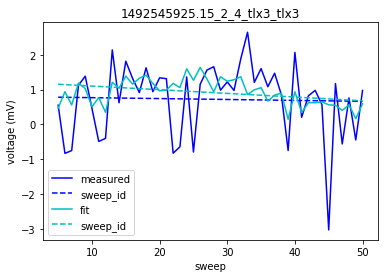

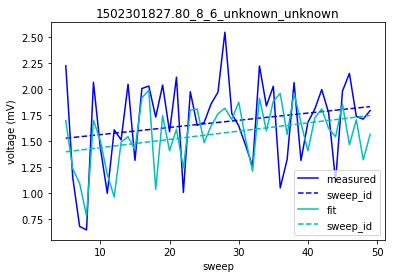

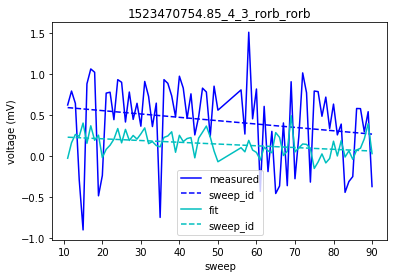

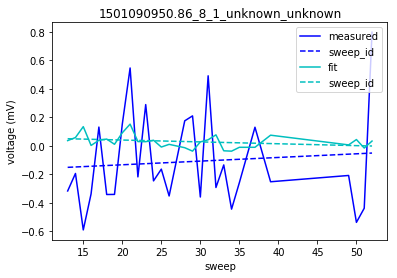

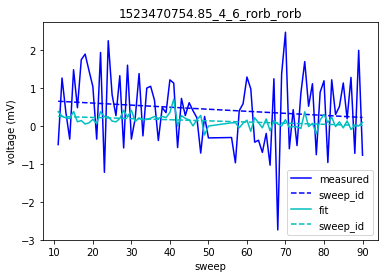

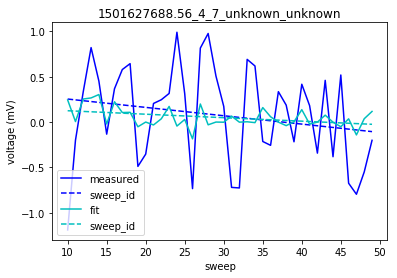

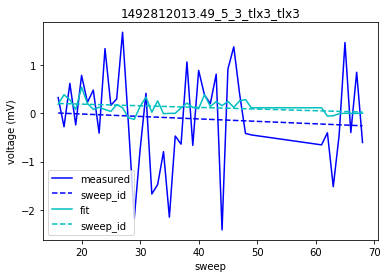

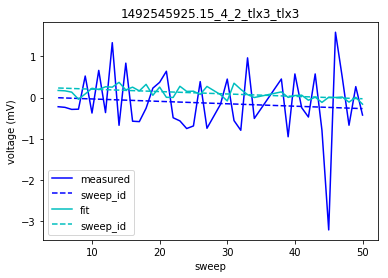

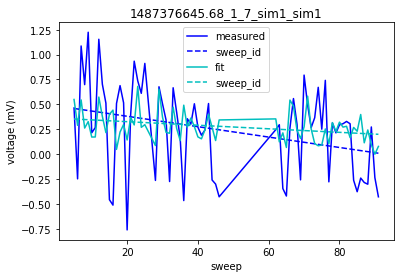

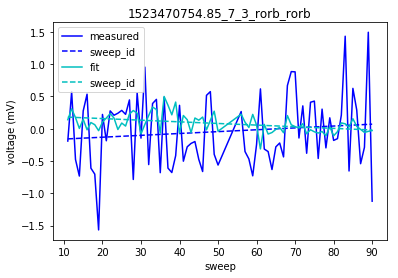

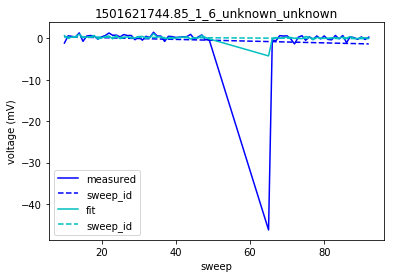

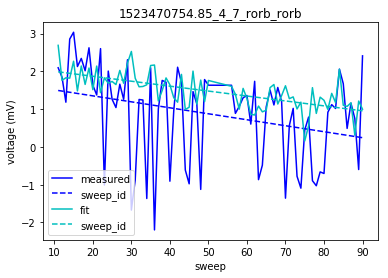

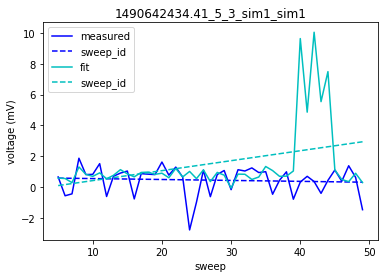

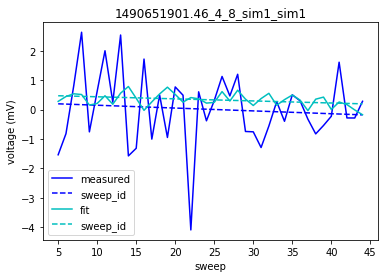

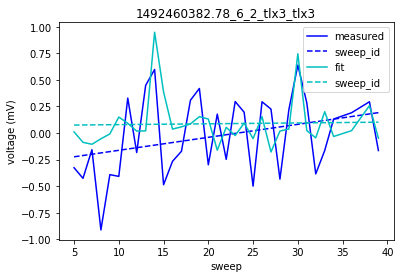

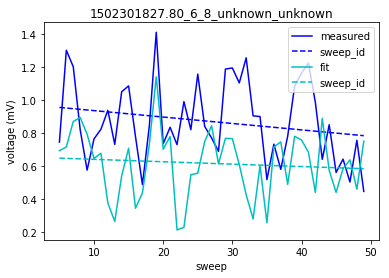

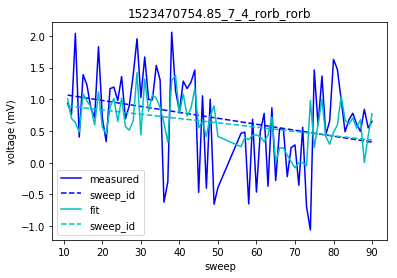

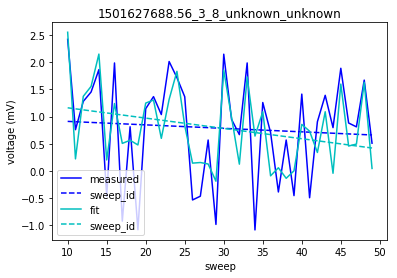

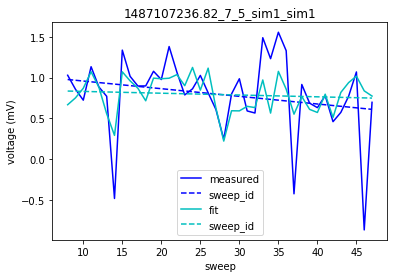

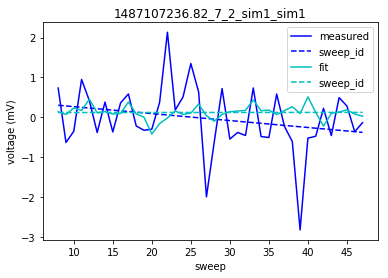

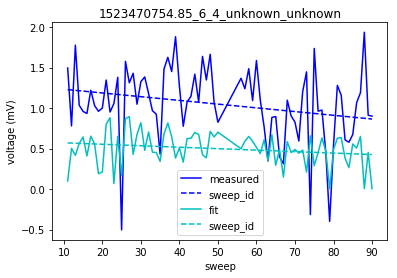

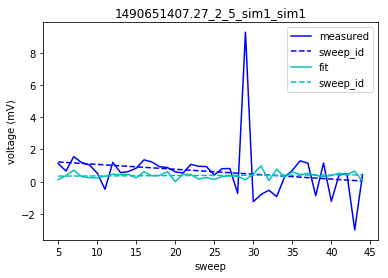

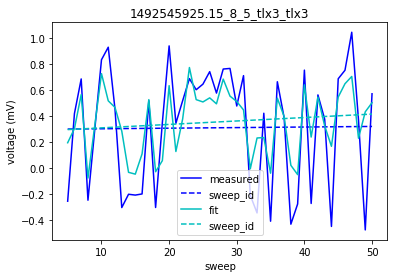

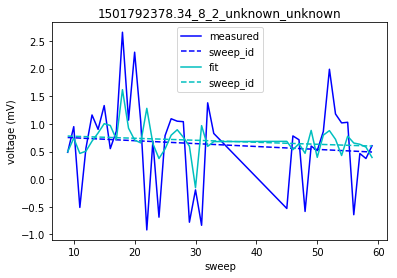

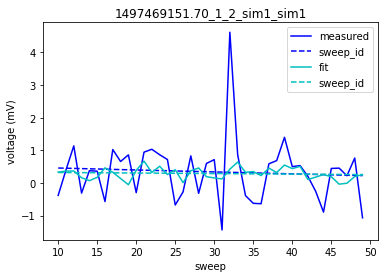

In [3]:
for file in csvs:
    df = pd.read_csv(file)
#    df=df.sort_values(by=['command_t0'])
    measured_amp=df['measured_amp'].values
    fit_amp=df['fit_amp'].values
#    time=df['command_t0'].values
    sweep=df['sweep_id']
    slope_measured, intercept_measured, _, _, _=stats.linregress(sweep, measured_amp)
    slope_fit, intercept_fit, _, _, _=stats.linregress(sweep, fit_amp)
    plt.figure()
    plt.plot(sweep, measured_amp*1e3, 'b', label='measured')
    plt.plot(sweep, (slope_measured*sweep+intercept_measured)*1e3, 'b--')
    
    plt.plot(sweep, fit_amp*1e3, 'c', label='fit')
    plt.plot(sweep, (slope_fit*sweep+intercept_fit)*1e3, '--c')
    plt.title(os.path.dirname(file).split('/')[-1])
    plt.ylabel('voltage (mV)')
    plt.xlabel('sweep')
    plt.legend()